# Lecture 2 Development Notebook for Serving Models in Streamlit

In [1]:
## Imports
import joblib
from lime.lime_tabular import LimeTabularExplainer

## DEMO : Setting Filepath (If not provided) 

In [2]:
from pprint import pprint

FPATHS = dict(
    demo_data={
        "raw": {
            "full": "Data/loan_approval.csv"
        },
        "ml": {
            "train": "Data/train.joblib",  
            "test": "Data/test.joblib", 
        },
        "nlp": {
            "nlp_full": "data/nlp/nlp_full.csv"} # raw movie review data 
            
    },
    demo_models={
        "linear_regression": "models/logreg_pipe.joblib", 
        "random_forest": "models/rf_pipe.joblib", 
    },
    demo_images={
        "banner": "Images/money_tree.png", 
    },
)
pprint(FPATHS)


{'demo_data': {'ml': {'test': 'Data/test.joblib', 'train': 'Data/train.joblib'},
               'nlp': {'nlp_full': 'data/nlp/nlp_full.csv'},
               'raw': {'full': 'Data/loan_approval.csv'}},
 'demo_images': {'banner': 'Images/money_tree.png'},
 'demo_models': {'linear_regression': 'models/logreg_pipe.joblib',
                 'random_forest': 'models/rf_pipe.joblib'}}


In [3]:
# save this file path in config folder to use it for deployment

import os, json
os.makedirs('config/', exist_ok=True)

FPATHS_FILE = 'config/filepaths.json'

with open(FPATHS_FILE, 'w') as f:
    json.dump(FPATHS, f)



In [6]:
# using custom function create the dictionaries using this path

# first need to import autorelaod function 
%load_ext autoreload
%autoreload 2
import functions as fn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We need to append the absolute filepath of the folder that contains our module. (the folder up one level "../")

In [5]:
# Add the Module to the Python Path

import sys, os
# Check sys.path for python path
sys.path

['/Users/purvikansara/Documents/CD_GitHub/AML_CodeAlong/adv-ml-wk03-deployment-codealongs/Lecture-2',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python310.zip',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/lib-dynload',
 '',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages']

In [ ]:
# Get the absolute file path of parent directory
os.path.abspath('../')

In [ ]:
# Add parent directory to python path
sys.path.append( os.path.abspath('../'))
sys.path[-1]

In [ ]:

# Try importing again
import functions as fn

In [ ]:
fn.create_directories_from_paths(FPATHS)

In [7]:
# Lets checck fpath

with open('config/filepaths.json', 'r') as f:
    path = json.load(f)

In [8]:
path.keys()

dict_keys(['demo_data', 'demo_models', 'demo_images'])

In [9]:
path['demo_data']

{'raw': {'full': 'Data/loan_approval.csv'},
 'ml': {'train': 'Data/train.joblib', 'test': 'Data/test.joblib'},
 'nlp': {'nlp_full': 'data/nlp/nlp_full.csv'}}

In [10]:
path['demo_data']['nlp']

{'nlp_full': 'data/nlp/nlp_full.csv'}

## Using the filepath alaready set 

In [11]:
## Open 

In [12]:
## Import pathlib file
pathlib = joblib.load('pathlib.joblib')
pathlib

{'models': {'RF': 'Models/RF_Pipe.joblib',
  'logreg': 'Models/logreg_pipe.joblib'},
 'data': {'train': 'Data/train.joblib', 'test': 'Data/test.joblib'}}

In [13]:
# def load_data(pathlib) to load data from pathlib file
def load_data(pathlib):
    train_path = pathlib['data']['train']
    X_train, y_train =  joblib.load(train_path)
    test_path = pathlib['data']['test']
    X_test, y_test = joblib.load(test_path)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data(pathlib)
X_train.head()

no_of_dependents      education self_employed  income_annum  \
3977                 5       Graduate           Yes       7600000   
2425                 0   Not Graduate            No       6000000   
1545                 2   Not Graduate           Yes       8200000   
173                  2   Not Graduate           Yes       7400000   
3405                 1       Graduate           Yes       3400000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
3977     18000000         12          452                   7900000   
2425     22900000         16          302                  12200000   
1545     27800000         16          827                  11500000   
173      28200000          8          376                  21900000   
3405      7000000          4          534                   3100000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  
3977                  4300000             23800000           4700000  
2425                  6500000             17700000           7100000  
1545                  8700000             26000000          10700000  
173                   5000000             17400000           5200000  
3405                  1600000             13000000           4000000

In [14]:
# def load_model(pathlib) from pathlib file
def load_model(pathlib, model_name='RF'):
    model_path = pathlib['models'][model_name]
    model = joblib.load(model_path)
    return model

## test load_model function

model_names = ['RF','logreg']

for model in model_names:
    print(model)
    model = load_model(pathlib, model_name=model)
    display(model)

RF


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['education', 'self_employed'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

logreg


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['education', 'self_employed'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

In [15]:
## def get_explainer()
def get_explainer(_model_pipe, X_train, labels):
    X_train_sc = _model_pipe[0].transform(X_train)
    feature_names = _model_pipe[0].get_feature_names_out()
    explainer = LimeTabularExplainer(
                    X_train_sc,
                    mode='classification',
                    feature_names=feature_names,
                    class_names=labels,
                    random_state=42
                    )
    return explainer

## test get_explainer()
explainer = get_explainer(model, X_train, labels=None)
explainer

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


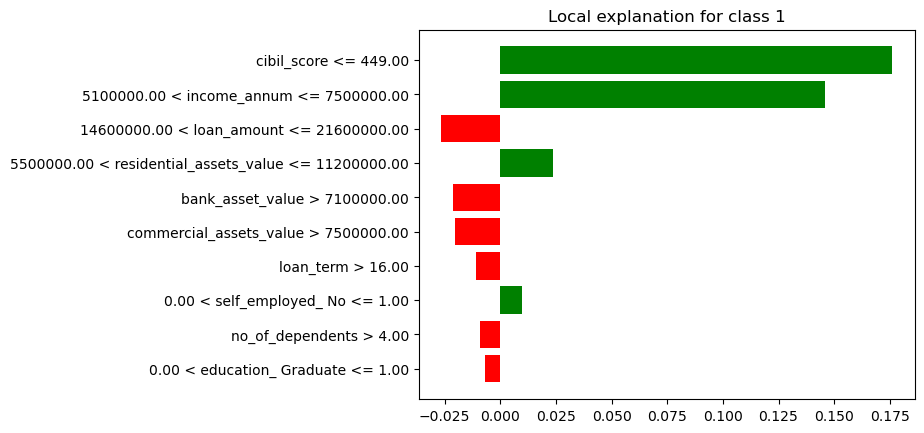

In [16]:
## def explain_instance()
def explain_instance(_explainer, _model_pipe, instance_to_explain):
    instance_to_explain_sc = _model_pipe[0].transform(instance_to_explain)
    explanation = _explainer.explain_instance(instance_to_explain_sc[0],
                                             _model_pipe[-1].predict_proba
                                             )
    return explanation

## test explain_instance()
explanation = explain_instance(explainer, model, X_test.head(1))
display(explanation)
explanation.as_pyplot_figure();